# Count Vectorizer (Code)

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/david/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/david/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import requests
data_request = requests.get('https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv')

In [4]:
import io
df = pd.read_csv(io.BytesIO(data_request.content))

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
inputs = df['text']
labels = df['labels']

<AxesSubplot: >

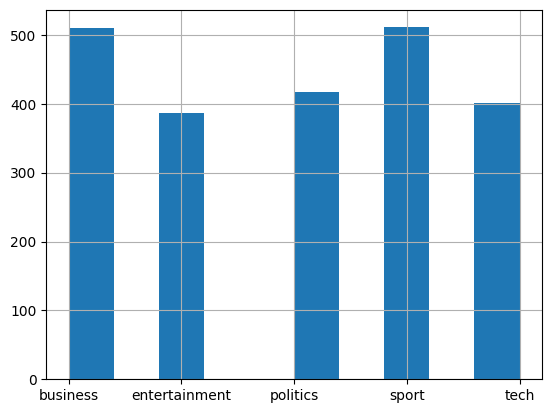

In [7]:
labels.hist()

In [8]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=12345)

In [9]:
def run_test(vectorizer):
    Xtrain = vectorizer.fit_transform(inputs_train)
    Xtest = vectorizer.transform(inputs_test)
    model = MultinomialNB().fit(Xtrain, Ytrain)
    return model.score(Xtrain, Ytrain), model.score(Xtest, Ytest), Xtrain

In [10]:
# plain CountVectorizer
run_test(CountVectorizer())

(0.9928057553956835,
 0.9838420107719928,
 <1668x25962 sparse matrix of type '<class 'numpy.int64'>'
 	with 336685 stored elements in Compressed Sparse Row format>)

In [11]:
# stopwords
run_test(CountVectorizer(stop_words='english'))

(0.9958033573141487,
 0.9856373429084381,
 <1668x25668 sparse matrix of type '<class 'numpy.int64'>'
 	with 241423 stored elements in Compressed Sparse Row format>)

In [12]:
# nltk stopwords
from nltk.corpus import stopwords
run_test(CountVectorizer(stop_words=stopwords.words('english')))

(0.9952038369304557,
 0.9838420107719928,
 <1668x25821 sparse matrix of type '<class 'numpy.int64'>'
 	with 263492 stored elements in Compressed Sparse Row format>)

In [13]:
# lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
pos_map = {'J': 'a', 'V': 'v', 'N': 'n', 'R': 'r'}
def lemma_tokenize(document):
    pos_tagged = pos_tag(word_tokenize(document))
    return [lemmatizer.lemmatize(word, pos_map.get(pos, 'n')) for word, pos in pos_tagged]
run_test(CountVectorizer(tokenizer=lemma_tokenize))

/home/david/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(0.9940047961630696,
 0.9820466786355476,
 <1668x27714 sparse matrix of type '<class 'numpy.int64'>'
 	with 342601 stored elements in Compressed Sparse Row format>)

In [16]:
# stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_tokenize(document):
    return [stemmer.stem(word) for word in word_tokenize(document)]
run_test(CountVectorizer(tokenizer=stem_tokenize))

/home/david/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(0.9928057553956835,
 0.9784560143626571,
 <1668x22516 sparse matrix of type '<class 'numpy.int64'>'
 	with 334503 stored elements in Compressed Sparse Row format>)

In [15]:
# just split
run_test(CountVectorizer(tokenizer=str.split))

/home/david/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(0.9964028776978417,
 0.9748653500897666,
 <1668x51551 sparse matrix of type '<class 'numpy.int64'>'
 	with 367991 stored elements in Compressed Sparse Row format>)